## Moderns (HGDP + 1000 Genomes + Lindo 2016 moderns ) analysis

We perform unsupervised analysis of the HGDP, 1000 Genomes  and modern Lindo 2016 samples and we try to see whether we get any meaningful clusters just by comparing between the moderns. the 1000 Genome samples we look at are a mix of European and American ancestries. 

In this script, we 

- Find the unsupervised ancestries of mutation patterns underlying the moderns samples
- Do we see any patterns in the clusters that are interesting?

In [1]:
options(warn=-1)
library(aRchaic)
library(CountClust)
library(maptpx)
library(grid)
library(gridBase)

Loading required package: ggplot2


In [2]:
## Load the modern signature data from HGDP, 1000 Genomes and Lindo moderns and pool the data 

#ThousandGmoderns <- get(load("../processed_data/1000Gmoderns-counts-table.rda"))
HGDPmoderns <- get(load("../processed_data/HGDPmoderns-counts-table.rda"))
Lindomoderns <- get(load("../processed_data/lindo2016moderns-counts-table.rda"))

#clubbed_counts_thousandG <- club_signature_counts(ThousandGmoderns)
#save(clubbed_counts_thousandG, file="../processed_data/1000Gmoderns-clubbed_counts-table.rda")
clubbed_counts_thousandG <- get(load("../processed_data/1000Gmoderns-clubbed_counts-table.rda"))
filtered_counts_thousandG <- filter_signatures_by_location(clubbed_counts_thousandG, max_pos=20, flanking_bases = 2)

clubbed_counts_HGDP <- club_signature_counts(HGDPmoderns)
filtered_counts_HGDP <- filter_signatures_by_location(clubbed_counts_HGDP, max_pos=20, flanking_bases = 2)

clubbed_counts_Lindomoderns <- club_signature_counts(Lindomoderns)
filtered_counts_Lindomoderns <- filter_signatures_by_location(clubbed_counts_Lindomoderns, max_pos=20, flanking_bases = 2)

matched_names <- intersect(colnames(filtered_counts_thousandG), intersect(colnames(filtered_counts_HGDP), colnames(filtered_counts_Lindomoderns)))

filtered_counts_thousandG_2 <- filtered_counts_thousandG[,match(matched_names, colnames(filtered_counts_thousandG))]
filtered_counts_HGDP_2 <- filtered_counts_HGDP[,match(matched_names, colnames(filtered_counts_HGDP))]
filtered_counts_Lindomoderns_2 <- filtered_counts_Lindomoderns[,match(matched_names, colnames(filtered_counts_Lindomoderns))]

labs <- c(rep("1000G", dim(filtered_counts_thousandG_2)[1]), rep("HGDP", dim(filtered_counts_HGDP_2)[1]), rep("Lindo-moderns", dim(filtered_counts_Lindomoderns_2)[1]))

pooled_counts <- rbind(filtered_counts_thousandG_2, filtered_counts_HGDP_2, filtered_counts_Lindomoderns_2)

In [11]:
topic_clus <- maptpx::topics(pooled_counts, K=2, tol=100)
save(topic_clus, file = "../processed_data/maptpx-runs/topic-clus-pooled-moderns-2.rda")


Estimating on a 601 document collection.
Fitting the 2 topic model.
log posterior increase: 696014, 5455, 12492.3, 38967.1, 11326.3, 8747.9, 9317.3, 7578.5, 5971, 4874.2, 3956.3, 3325.7, 2802.1, 2337.7, 1993.8, 1778.7, 1553.2, 1304, 1165.6, 1112.4, 1084.6, 1056.6, 982.2, 906.3, 864.1, 757.5, 696.7, 683.4, 647.5, 623.4, 588.4, 533.9, 475.7, 416.4, 371.5, 353.7, 338.1, 325.9, 330.9, 320, 279.8, 258.5, 247.3, 226.1, 195.7, 181.6, 179.2, 169.7, 153.7, 116.8, 104.1, 107.1, done.


In [12]:
topic_clus <- get(load("../processed_data/maptpx-runs/topic-clus-pooled-moderns-2.rda"))

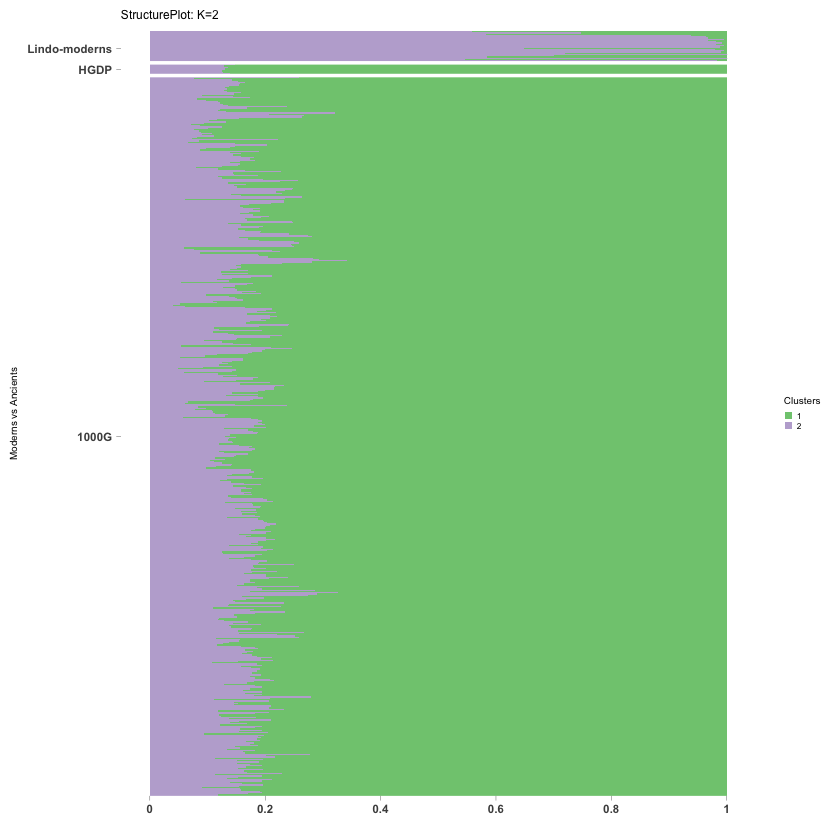

In [14]:
omega <- topic_clus$omega

annotation <- data.frame(
  sample_id = paste0("X", c(1:NROW(omega))),
  tissue_label = factor(labs)
)

CountClust::StructureGGplot(omega = omega,
                            annotation = annotation,
                            palette = RColorBrewer::brewer.pal(8, "Accent"),
                            yaxis_label = "Moderns vs Ancients",
                            order_sample = FALSE,
                            figure_title = paste0("StructurePlot: K=", dim(omega)[2],""),
                            axis_tick = list(axis_ticks_length = .1,
                                             axis_ticks_lwd_y = .1,
                                             axis_ticks_lwd_x = .1,
                                             axis_label_size = 7,
                                             axis_label_face = "bold"))

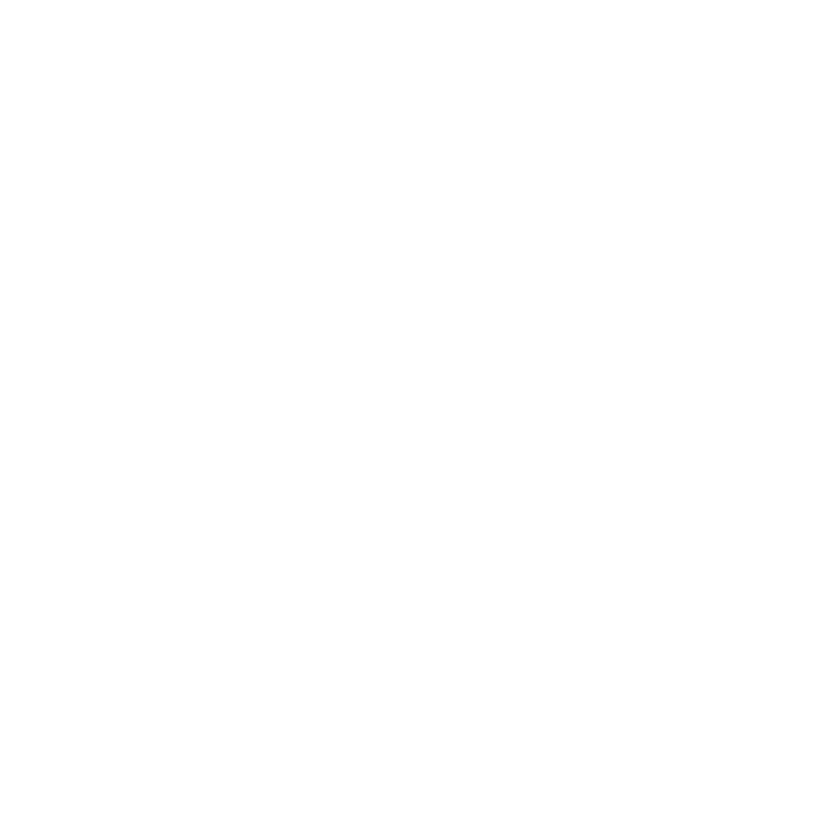

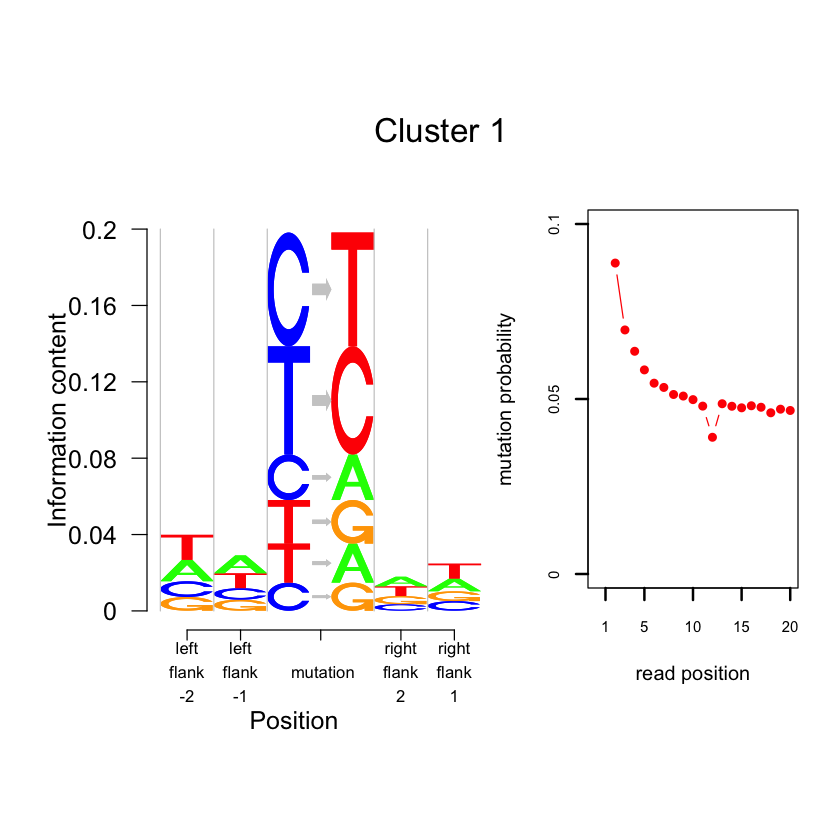

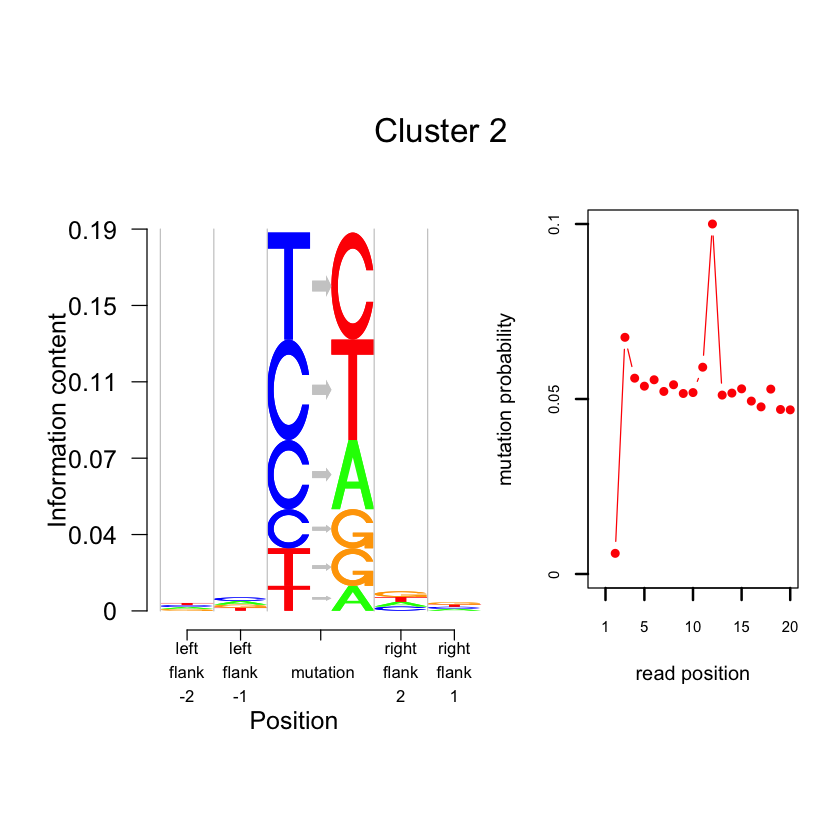

In [16]:
plot.new()
damageLogo_pos(topic_clus$theta, max_pos=20)

## Summary

Here we performed a GoM clustering of all moderns - Lindo et al, HGDP and 1000 Genomes for K=2, Note here that for K=2, Lindo data seemed to separate out from other two, mainly owing to the blip in the 12th position from the end of the read resulting in high number of mutations observed in Nextera samples.

In [17]:
topic_clus <- maptpx::topics(pooled_counts, K=3, tol=100)
save(topic_clus, file = "../processed_data/maptpx-runs/topic-clus-pooled-moderns-3.rda")


Estimating on a 601 document collection.
Fitting the 3 topic model.
log posterior increase: 273452.3, 7217.1, 42578.9, 22614.6, 10370.5, 10940.7, 9859.3, 7436.5, 5849.4, 4686.4, 3808.2, 3098.7, 2535.7, 2245.9, 1931.9, 1622.3, 1455.9, 1374.1, 1326.2, 1226.1, 1105.1, 1056.3, 946.6, 878.4, 861.4, 824.3, 769.3, 693.4, 623.2, 552.9, 481.3, 471.5, 459.2, 449.3, 430.1, 408.2, 350.5, 328.7, 321, 304.2, 267.3, 258.1, 219.2, 209.7, 171.1, 175.6, 163.3, 130.2, done.
